<h1 align="center">Title: Indian Startup Funding Analysis</h1>

## Business Objective:
The goal of this project is to investigate the Indian Startup Ecosystem to better understand and provide valuable insight into the opportunites and challenges in the ecosystem in order to help stakeholders who plan on venturing into the startup ecosystem in India to make informed decisions based on findings from analyzing the dataset from 2018 to 2021.

### Import all necessary libraries

In [641]:
# Data Manipulation Libraries
import re
import pandas as pd
from sklearn.impute import SimpleImputer
from scipy.stats import mannwhitneyu

# Visualization Libraries
import matplotlib.pyplot as plt
import seaborn as sns
import squarify as sq

# Database Libraries
import pyodbc

# Other Utilities
from dotenv import dotenv_values
from warnings import filterwarnings
filterwarnings('ignore')

### Create connection for SQL Server

In [642]:
# Load Environment Variables
config = dotenv_values('.env')

Server_name = config.get('Server')
Database_name = config.get('Database')
Username = config.get('Login')
PassWord = config.get('Password')

# Create Database Connection
connection_string = f"DRIVER={{SQL Server}};SERVER={Server_name};DATABASE={Database_name};UID={Username};PWD={PassWord}"

connection = pyodbc.connect(connection_string)

### Load tables from SQL and save a copy of the dataset

In [643]:
# Query table as dataframe
query = "SELECT * FROM dbo.LP1_startup_funding2020"
df_2020 = pd.read_sql(query, connection)

# Preview the dataset
df_2020.head()

,Company_Brand,Founded,HeadQuarter,Sector,What_it_does,Founders,Investor,Amount,Stage,column10
0,Aqgromalin,"2,019.00",Chennai,AgriTech,Cultivating Ideas for Profit,"Prasanna Manogaran, Bharani C L",Angel investors,"200,000.00",None,None
1,Krayonnz,"2,019.00",Bangalore,EdTech,An academy-guardian-scholar centric ecosystem ...,"Saurabh Dixit, Gurudutt Upadhyay",GSF Accelerator,"100,000.00",Pre-seed,None
2,PadCare Labs,"2,018.00",Pune,Hygiene management,Converting bio-hazardous waste to harmless waste,Ajinkya Dhariya,Venture Center,NaN,Pre-seed,None
3,NCOME,"2,020.00",New Delhi,Escrow,Escrow-as-a-service platform,Ritesh Tiwari,"Venture Catalysts, PointOne Capital","400,000.00",None,None
4,Gramophone,"2,016.00",Indore,AgriTech,Gramophone is an AgTech platform enabling acce...,"Ashish Rajan Singh, Harshit Gupta, Nishant Mah...","Siana Capital Management, Info Edge","340,000.00",None,None


In [644]:
df_2020.shape

(1055, 10)

In [645]:
# Query table as dataframe
query = "SELECT * FROM dbo.LP1_startup_funding2021"
df_2021 = pd.read_sql(query, connection)

# Preview the dataset
df_2021.head()

,Company_Brand,Founded,HeadQuarter,Sector,What_it_does,Founders,Investor,Amount,Stage
0,Unbox Robotics,"2,019.00",Bangalore,AI startup,Unbox Robotics builds on-demand AI-driven ware...,"Pramod Ghadge, Shahid Memon","BEENEXT, Entrepreneur First","$1,200,000",Pre-series A
1,upGrad,"2,015.00",Mumbai,EdTech,UpGrad is an online higher education platform.,"Mayank Kumar, Phalgun Kompalli, Ravijot Chugh,...","Unilazer Ventures, IIFL Asset Management","$120,000,000",None
2,Lead School,"2,012.00",Mumbai,EdTech,LEAD School offers technology based school tra...,"Smita Deorah, Sumeet Mehta","GSV Ventures, Westbridge Capital","$30,000,000",Series D
3,Bizongo,"2,015.00",Mumbai,B2B E-commerce,Bizongo is a business-to-business online marke...,"Aniket Deb, Ankit Tomar, Sachin Agrawal","CDC Group, IDG Capital","$51,000,000",Series C
4,FypMoney,"2,021.00",Gurugram,FinTech,"FypMoney is Digital NEO Bank for Teenagers, em...",Kapil Banwari,"Liberatha Kallat, Mukesh Yadav, Dinesh Nagpal","$2,000,000",Seed


In [646]:
df_2021.shape

(1209, 9)

In [647]:
# Save the dataset as csv files for each year
df_2021.to_csv('startup_funding2021.csv')
df_2020.to_csv('startup_funding2020.csv')

In [648]:
df_2021.shape

(1209, 9)

### Load other datasets in csv file

In [649]:
# Read csv file
df_2018 = pd.read_csv('startup_funding2018.csv')
df_2018.head()

,Company Name,Industry,Round/Series,Amount,Location,About Company
0,TheCollegeFever,"Brand Marketing, Event Promotion, Marketing, S...",Seed,250000,"Bangalore, Karnataka, India","TheCollegeFever is a hub for fun, fiesta and f..."
1,Happy Cow Dairy,"Agriculture, Farming",Seed,"₹40,000,000","Mumbai, Maharashtra, India",A startup which aggregates milk from dairy far...
2,MyLoanCare,"Credit, Financial Services, Lending, Marketplace",Series A,"₹65,000,000","Gurgaon, Haryana, India",Leading Online Loans Marketplace in India
3,PayMe India,"Financial Services, FinTech",Angel,2000000,"Noida, Uttar Pradesh, India",PayMe India is an innovative FinTech organizat...
4,Eunimart,"E-Commerce Platforms, Retail, SaaS",Seed,—,"Hyderabad, Andhra Pradesh, India",Eunimart is a one stop solution for merchants ...


In [650]:
df_2018.shape

(526, 6)

In [651]:
# Read csv file
df_2019 = pd.read_csv('startup_funding2019.csv')
df_2019.head()

,Company/Brand,Founded,HeadQuarter,Sector,What it does,Founders,Investor,Amount($),Stage
0,Bombay Shaving,NaN,NaN,Ecommerce,Provides a range of male grooming products,Shantanu Deshpande,Sixth Sense Ventures,"$6,300,000",NaN
1,Ruangguru,"2,014.00",Mumbai,Edtech,A learning platform that provides topic-based ...,"Adamas Belva Syah Devara, Iman Usman.",General Atlantic,"$150,000,000",Series C
2,Eduisfun,NaN,Mumbai,Edtech,It aims to make learning fun via games.,Jatin Solanki,"Deepak Parekh, Amitabh Bachchan, Piyush Pandey","$28,000,000",Fresh funding
3,HomeLane,"2,014.00",Chennai,Interior design,Provides interior designing solutions,"Srikanth Iyer, Rama Harinath","Evolvence India Fund (EIF), Pidilite Group, FJ...","$30,000,000",Series D
4,Nu Genes,"2,004.00",Telangana,AgriTech,"It is a seed company engaged in production, pr...",Narayana Reddy Punyala,Innovation in Food and Agriculture (IFA),"$6,000,000",NaN


In [652]:
df_2019.shape

(89, 9)

<h3>Hypothesis</h3>
<p>Null: Funding amount received by tech startups do not differ significantly from non-tech startups funding received.</p>
<p>Alternative: Funding amount received by tech startups do differ significantly from non-tech startups funding received.</p>

<h3>Questions</h3>

1. What is the total disclosed amount of funding received from investors from 2018 to 2021?
2. What is the trend for the number of startups that received disclosed amount of funding from 2018-2021?
3. What is the total disclosed amount of funding for startups based on their sector?
4. What are the three locations that received the most disclosed funding amount?
5. What are the three locations that received the least disclosed funding amount?
6. What is the relationship between stage and funding receive?
7. How many tech and non tech startups have received disclosed funding amount from investors from 2018-2021?
8. How much disclosed funding amount was received by tech and non-tech companies?

## Rename columns, generate columns where needed and merge datasets

In [653]:
# Add Funding Year for all the dataset
df_2021['Funding_Year']=2021; df_2020['Funding_Year']=2020; df_2019['Funding_Year']=2019; df_2018['Funding_Year']=2018

In [654]:
# Adjust the column names of the columns in the datasets

df_2021.rename(columns={'Amount': 'Amount($)'},inplace=True)

df_2020.rename(columns={'Amount': 'Amount($)'},inplace=True)

df_2019.rename(columns={'Company/Brand': 'Company_Brand',
                        'What it does': 'What_it_does'}, inplace=True)

df_2018.rename(columns={'Company Name': 'Company_Brand',
                'Amount': 'Amount($)',
                'About Company': 'What_it_does',
                'Round/Series': 'Stage'}, inplace=True)

In [655]:
df_2021.head(1)

,Company_Brand,Founded,HeadQuarter,Sector,What_it_does,Founders,Investor,Amount($),Stage,Funding_Year
0,Unbox Robotics,"2,019.00",Bangalore,AI startup,Unbox Robotics builds on-demand AI-driven ware...,"Pramod Ghadge, Shahid Memon","BEENEXT, Entrepreneur First","$1,200,000",Pre-series A,2021


In [656]:
df_2020.head(1)

,Company_Brand,Founded,HeadQuarter,Sector,What_it_does,Founders,Investor,Amount($),Stage,column10,Funding_Year
0,Aqgromalin,"2,019.00",Chennai,AgriTech,Cultivating Ideas for Profit,"Prasanna Manogaran, Bharani C L",Angel investors,"200,000.00",None,None,2020


In [657]:
df_2019.head(1)

,Company_Brand,Founded,HeadQuarter,Sector,What_it_does,Founders,Investor,Amount($),Stage,Funding_Year
0,Bombay Shaving,NaN,NaN,Ecommerce,Provides a range of male grooming products,Shantanu Deshpande,Sixth Sense Ventures,"$6,300,000",NaN,2019


In [658]:
df_2018.head(1)

,Company_Brand,Industry,Stage,Amount($),Location,What_it_does,Funding_Year
0,TheCollegeFever,"Brand Marketing, Event Promotion, Marketing, S...",Seed,250000,"Bangalore, Karnataka, India","TheCollegeFever is a hub for fun, fiesta and f...",2018


Observing a preview of all the dataset, we will consider the 2021 dataset as our base format for the columns in all our dataset. The 2018 dataset do not follow the agreed base dataset and must be corrected to meet the standard. We see for instance from the Location column that the value in the first index position matches the values for HeadQuarters in the other datasets. The Location column in the 2018 dataset must be dropped and the industry column name changed to Sector.

### Extract HeadQuarter from Location column in the 2018 dataset

In [659]:
# Add HeadQuarter column from the location column
df_2018['HeadQuarter'] = df_2018['Location'].str.split(',').str[0]
df_2018.head()

,Company_Brand,Industry,Stage,Amount($),Location,What_it_does,Funding_Year,HeadQuarter
0,TheCollegeFever,"Brand Marketing, Event Promotion, Marketing, S...",Seed,250000,"Bangalore, Karnataka, India","TheCollegeFever is a hub for fun, fiesta and f...",2018,Bangalore
1,Happy Cow Dairy,"Agriculture, Farming",Seed,"₹40,000,000","Mumbai, Maharashtra, India",A startup which aggregates milk from dairy far...,2018,Mumbai
2,MyLoanCare,"Credit, Financial Services, Lending, Marketplace",Series A,"₹65,000,000","Gurgaon, Haryana, India",Leading Online Loans Marketplace in India,2018,Gurgaon
3,PayMe India,"Financial Services, FinTech",Angel,2000000,"Noida, Uttar Pradesh, India",PayMe India is an innovative FinTech organizat...,2018,Noida
4,Eunimart,"E-Commerce Platforms, Retail, SaaS",Seed,—,"Hyderabad, Andhra Pradesh, India",Eunimart is a one stop solution for merchants ...,2018,Hyderabad


In [660]:
# Rename Industry column name to Sector
df_2018.rename(columns={'Industry':'Sector'}, inplace=True)

# Drop Location column
df_2018.drop('Location', axis=1, inplace=True)

df_2018.head()

,Company_Brand,Sector,Stage,Amount($),What_it_does,Funding_Year,HeadQuarter
0,TheCollegeFever,"Brand Marketing, Event Promotion, Marketing, S...",Seed,250000,"TheCollegeFever is a hub for fun, fiesta and f...",2018,Bangalore
1,Happy Cow Dairy,"Agriculture, Farming",Seed,"₹40,000,000",A startup which aggregates milk from dairy far...,2018,Mumbai
2,MyLoanCare,"Credit, Financial Services, Lending, Marketplace",Series A,"₹65,000,000",Leading Online Loans Marketplace in India,2018,Gurgaon
3,PayMe India,"Financial Services, FinTech",Angel,2000000,PayMe India is an innovative FinTech organizat...,2018,Noida
4,Eunimart,"E-Commerce Platforms, Retail, SaaS",Seed,—,Eunimart is a one stop solution for merchants ...,2018,Hyderabad


Concatenate the dataset into one full dataset

In [661]:
full_df = pd.concat([df_2021, df_2020, df_2019, df_2018],ignore_index=True)
full_df.head()

,Company_Brand,Founded,HeadQuarter,Sector,What_it_does,Founders,Investor,Amount($),Stage,Funding_Year,column10
0,Unbox Robotics,"2,019.00",Bangalore,AI startup,Unbox Robotics builds on-demand AI-driven ware...,"Pramod Ghadge, Shahid Memon","BEENEXT, Entrepreneur First","$1,200,000",Pre-series A,2021,NaN
1,upGrad,"2,015.00",Mumbai,EdTech,UpGrad is an online higher education platform.,"Mayank Kumar, Phalgun Kompalli, Ravijot Chugh,...","Unilazer Ventures, IIFL Asset Management","$120,000,000",None,2021,NaN
2,Lead School,"2,012.00",Mumbai,EdTech,LEAD School offers technology based school tra...,"Smita Deorah, Sumeet Mehta","GSV Ventures, Westbridge Capital","$30,000,000",Series D,2021,NaN
3,Bizongo,"2,015.00",Mumbai,B2B E-commerce,Bizongo is a business-to-business online marke...,"Aniket Deb, Ankit Tomar, Sachin Agrawal","CDC Group, IDG Capital","$51,000,000",Series C,2021,NaN
4,FypMoney,"2,021.00",Gurugram,FinTech,"FypMoney is Digital NEO Bank for Teenagers, em...",Kapil Banwari,"Liberatha Kallat, Mukesh Yadav, Dinesh Nagpal","$2,000,000",Seed,2021,NaN


## Exploratory Data Analysis (EDA)

In [662]:
print('The rows and columns in the dataset are', full_df.shape, 'respectively.')

The rows and columns in the dataset are (2879, 11) respectively.


In [663]:
# Check structure of the dataset
full_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2879 entries, 0 to 2878
Data columns (total 11 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Company_Brand  2879 non-null   object 
 1   Founded        2110 non-null   float64
 2   HeadQuarter    2765 non-null   object 
 3   Sector         2861 non-null   object 
 4   What_it_does   2879 non-null   object 
 5   Founders       2334 non-null   object 
 6   Investor       2253 non-null   object 
 7   Amount($)      2622 non-null   object 
 8   Stage          1941 non-null   object 
 9   Funding_Year   2879 non-null   int64  
 10  column10       2 non-null      object 
dtypes: float64(1), int64(1), object(9)
memory usage: 247.5+ KB


We see the datatype for each column in the dataset and the number of non-null values in each column.

<h3>Check for missing values</h3>

In [664]:
# Check for total missing values in the columns
full_df.isna().sum()

Company_Brand       0
Founded           769
HeadQuarter       114
Sector             18
What_it_does        0
Founders          545
Investor          626
Amount($)         257
Stage             938
Funding_Year        0
column10         2877
dtype: int64

* We see the total number of missing values in the columns.
* Handling of missing values will be done in the data cleaning phase when the individual columns are inspected.

<h3>Check for duplicate values</h3>

In [665]:
f'There are {full_df.duplicated().sum()} duplicate values in the 2021 dataset'

'There are 23 duplicate values in the 2021 dataset'

* Handing of duplicate values will be done in the data cleaning phase when the  individual columns are inspected.

<h3>Check the descriptive statistics of all the columns in each dataset</h3>

In [666]:
full_df.describe(include=['number', 'object']).T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
Company_Brand,2879,2214,BharatPe,10,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Founded,"2,110.00",NaN,NaN,NaN,"2,016.08",4.37,"1,963.00","2,015.00","2,017.00","2,019.00","2,021.00"
HeadQuarter,2765,141,Bangalore,866,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Sector,2861,873,FinTech,173,NaN,NaN,NaN,NaN,NaN,NaN,NaN
What_it_does,2879,2691,Provides online learning classes,5,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Founders,2334,1980,"Ashneer Grover, Shashvat Nakrani",7,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Investor,2253,1777,Inflection Point Ventures,36,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Amount($),2622,774,—,148,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Stage,1941,75,Seed,606,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Funding_Year,"2,879.00",NaN,NaN,NaN,"2,020.02",1.09,"2,018.00","2,020.00","2,020.00","2,021.00","2,021.00"


<h4>From the descriptive tables above, we are able to observe the minimum, maximum, and other statistics of the columns. The categorical columns however do not have most of these values as we cannot get most of the statistical measures on categorical values. Further investigation on the columns will be proceeded with in order to get a wholistic view of the dataset.</h4>

## Data Cleaning

### Correct duplicates in the dataset

In [667]:
f'We have {full_df.duplicated().sum()} duplicated rows in the dataset and since there are no unique identifiers assigned to the values we drop the duplicated values.'

'We have 23 duplicated rows in the dataset and since there are no unique identifiers assigned to the values we drop the duplicated values.'

In [668]:
# Correct duplicates in the entire dataset
full_df.drop_duplicates(keep='first', inplace=True)

full_df.duplicated().sum()

0

### Drop Column 10 from the dataset

Considering the number of missing values in the column, imputing is with any value will be in-valid hence we must drop the column.

In [669]:
# Drop column10
full_df.drop('column10', axis=1, inplace=True)
full_df.head()

,Company_Brand,Founded,HeadQuarter,Sector,What_it_does,Founders,Investor,Amount($),Stage,Funding_Year
0,Unbox Robotics,"2,019.00",Bangalore,AI startup,Unbox Robotics builds on-demand AI-driven ware...,"Pramod Ghadge, Shahid Memon","BEENEXT, Entrepreneur First","$1,200,000",Pre-series A,2021
1,upGrad,"2,015.00",Mumbai,EdTech,UpGrad is an online higher education platform.,"Mayank Kumar, Phalgun Kompalli, Ravijot Chugh,...","Unilazer Ventures, IIFL Asset Management","$120,000,000",None,2021
2,Lead School,"2,012.00",Mumbai,EdTech,LEAD School offers technology based school tra...,"Smita Deorah, Sumeet Mehta","GSV Ventures, Westbridge Capital","$30,000,000",Series D,2021
3,Bizongo,"2,015.00",Mumbai,B2B E-commerce,Bizongo is a business-to-business online marke...,"Aniket Deb, Ankit Tomar, Sachin Agrawal","CDC Group, IDG Capital","$51,000,000",Series C,2021
4,FypMoney,"2,021.00",Gurugram,FinTech,"FypMoney is Digital NEO Bank for Teenagers, em...",Kapil Banwari,"Liberatha Kallat, Mukesh Yadav, Dinesh Nagpal","$2,000,000",Seed,2021


### Check the amount column for inconsistencies

In [670]:
# Check the unique values in the column
full_df['Amount($)'].unique()

array(['$1,200,000', '$120,000,000', '$30,000,000', '$51,000,000',
       '$2,000,000', '$188,000,000', '$200,000', 'Undisclosed',
       '$1,000,000', '$3,000,000', '$100,000', '$700,000', '$9,000,000',
       '$40,000,000', '$49,000,000', '$400,000', '$300,000',
       '$25,000,000', '$160,000,000', '$150,000', '$1,800,000',
       '$5,000,000', '$850,000', '$53,000,000', '$500,000', '$1,100,000',
       '$6,000,000', '$800,000', '$10,000,000', '$21,000,000',
       '$7,500,000', '$26,000,000', '$7,400,000', '$1,500,000',
       '$600,000', '$800,000,000', '$17,000,000', '$3,500,000',
       '$15,000,000', '$215,000,000', '$2,500,000', '$350,000,000',
       '$5,500,000', '$83,000,000', '$110,000,000', '$500,000,000',
       '$65,000,000', '$150,000,000,000', '$300,000,000', '$2,200,000',
       '$35,000,000', '$140,000,000', '$4,000,000', '$13,000,000', None,
       '$Undisclosed', '$2000000', '$800000', '$6000000', '$2500000',
       '$9500000', '$13000000', '$5000000', '$8000000',

* We consider the base value for the amount column to be dollars so any value in the amount column with no sign will be treated as a dollar value.
* Certain rows in the amount column have wrong inputs which are values of other columns and these rows must also be corrected.
* The undisclosed values in the column should be replaced with NaN since we can't replace it with zero as that will mean the amount raised was 0 dollars.
* The rows with INR currency sign will be converted using the exchange rate for the year in which funding was received.
* The column must be converted to a float dtype after correcting the inconsistencies

In [671]:
# Check for null values in the Amount column
f"There are {full_df['Amount($)'].isnull().sum()} total missing values in the amount column."

'There are 256 total missing values in the amount column.'

The missing values in the amount column cannot be replace with the mean or with zeros. Dealing with these missing values, the assumption is that all the missing values are undisclosed values in our dataset and hence we can drop these values.

In [672]:
# Drop missing values in the dataset where the Amount is null
full_df.dropna(axis=0, subset='Amount($)', inplace=True)

In [673]:
# Check missing values in the columns of the dataset
full_df.isnull().sum()

Company_Brand      0
Founded          700
HeadQuarter       97
Sector            16
What_it_does       0
Founders         539
Investor         612
Amount($)          0
Stage            787
Funding_Year       0
dtype: int64

In [674]:
# Assign the index of the rows to a string
symbols_string = full_df.index[full_df['Amount($)'].isin(['$','—'])]
symbols = ['$','—']

# Replace the columns with a dollar sign or ' in the amount value with NA
full_df.loc[symbols_string, ['Amount($)']] = full_df.loc[symbols_string, ['Amount($)']].replace(symbols, pd.NA, inplace=True)

In [675]:
# Preview rows with amount vales showing $Undisclosed, $undisclosed, and Undisclosed
undisclosed_list = ['$Undisclosed', '$undisclosed', 'Undisclosed']

# Get the index for all rows with undisclosed
undisclosed_index = full_df.index[full_df['Amount($)'].isin(undisclosed_list)]

# Replace undisclosed values with NA
full_df.loc[undisclosed_index, ['Amount($)']] = full_df.loc[undisclosed_index, ['Amount($)']].replace(undisclosed_list, pd.NA)

In [676]:
# Change the values in the amount column with the original amount values in the Stage column
amount_list = ['ITO Angel Network, LetsVenture', 'JITO Angel Network, LetsVenture', 'ah! Ventures', 'Upsparks']

amount_index = full_df.index[full_df['Amount($)'].isin(amount_list)]

stage_values = full_df.loc[amount_index, ['Amount($)']].values

full_df.loc[amount_index, ['Amount($)']] = full_df.loc[amount_index, ['Stage']].values

full_df.loc[amount_index, ['Stage']] = stage_values
full_df.loc[amount_index]

,Company_Brand,Founded,HeadQuarter,Sector,What_it_does,Founders,Investor,Amount($),Stage,Funding_Year
98,FanPlay,"2,020.00",Computer Games,Computer Games,A real money game app specializing in trivia g...,YC W21,"Pritesh Kumar, Bharat Gupta",$1200000,Upsparks,2021
538,Little Leap,"2,020.00",New Delhi,EdTech,Soft Skills that make Smart Leaders,Holistic Development Programs for children in ...,Vishal Gupta,$300000,ah! Ventures,2021
551,BHyve,"2,020.00",Mumbai,Human Resources,A Future of Work Platform for diffusing Employ...,Backed by 100x.VC,"Omkar Pandharkame, Ketaki Ogale",$300000,"ITO Angel Network, LetsVenture",2021
677,Saarthi Pedagogy,"2,015.00",Ahmadabad,EdTech,"India's fastest growing Pedagogy company, serv...",Pedagogy,Sushil Agarwal,$1000000,"JITO Angel Network, LetsVenture",2021


In [677]:
# Change the values in the amount column with the original amount values in the Stage column
stage_list = ['Seed', 'Pre-series A', 'Series C']

stage_index = full_df.index[full_df['Amount($)'].isin(stage_list)]

full_df.loc[stage_index, ['Stage']] = full_df.loc[stage_index, ['Amount($)']].values

full_df.loc[stage_index, ['Amount($)']] = full_df.loc[stage_index, ['Investor']].values

full_df.loc[stage_index, ['Investor']] = full_df.loc[stage_index, ['Investor']].replace(stage_list, pd.NA, inplace=True)
full_df.loc[stage_index]

,Company_Brand,Founded,HeadQuarter,Sector,What_it_does,Founders,Investor,Amount($),Stage,Funding_Year
242,Fullife Healthcare,"2,009.00",Pharmaceuticals\t#REF!,Primary Business is Development and Manufactur...,Varun Khanna,Morgan Stanley Private Equity Asia,None,$22000000,Series C,2021
257,MoEVing,"2,021.00",Gurugram\t#REF!,MoEVing is India's only Electric Mobility focu...,"Vikash Mishra, Mragank Jain","Anshuman Maheshwary, Dr Srihari Raju Kalidindi",None,$5000000,Seed,2021
545,AdmitKard,"2,016.00",Noida,EdTech,A tech solution for end to end career advisory...,"Vamsi Krishna, Pulkit Jain, Gaurav Munjal\t#REF!",None,$1000000,Pre-series A,2021
1148,Godamwale,"2,016.00",Mumbai,Logistics & Supply Chain,Godamwale is tech enabled integrated logistics...,"Basant Kumar, Vivek Tiwari, Ranbir Nandan",None,1000000\t#REF!,Seed,2021


In [678]:
# Inspect the rows and columns
full_df.shape

(2600, 10)

In [679]:
# Checl null values in the columns
full_df.isnull().sum()

Company_Brand      0
Founded          700
HeadQuarter       97
Sector            16
What_it_does       0
Founders         539
Investor         616
Amount($)        299
Stage            783
Funding_Year       0
dtype: int64

A total of 299 firms didn't disclose or failed to provide information on the amount of funding received. We will proceed with dropping these values since there do not give us insight into the funding amount received.

In [680]:
# Drop missing values where the missing value is in the Amount column
full_df.dropna(subset='Amount($)', inplace=True)

In [681]:
full_df.shape

(2301, 10)

In [682]:
# Change the data type of the amount column to string and replace the $ and , with an empty string
full_df['Amount($)'] = full_df['Amount($)'].astype(str)

full_df['Amount($)'] = full_df['Amount($)'].apply(lambda x: x.replace('$',''))

full_df['Amount($)'] = full_df['Amount($)'].apply(lambda x: x.replace(',',''))

In [683]:
# Get the index position of the amount values that contain ₹
INR_index = full_df.index[full_df['Amount($)'].str.contains('₹')]
full_df.loc[INR_index, ['Amount($)']]

,Amount($)
2354,₹40000000
2355,₹65000000
2359,₹16000000
2360,₹50000000
2368,₹100000000
...,...
2866,₹1130000000
2867,₹810000000
2869,₹1400000000
2870,₹10000000


* According to [Exchange Rates UK](https://www.exchangerates.org.uk/INR-USD-spot-exchange-rates-history-2018.html), the average rate for 1 INR to USD in 2018 was `0.0146` and that is the rate we are using to convert the INR amount to dollars.

In [684]:
# Change the INR symbol and other special characters and replace them with an empty string
INR_index = full_df.index[full_df['Amount($)'].str.contains('₹')]

full_df['Amount($)'] = full_df['Amount($)'].apply(lambda x: x.replace('₹',''))
full_df['Amount($)'] = full_df['Amount($)'].apply(lambda x: x.replace('\t#REF!',''))

# Convert the amount column to a float datatype
full_df['Amount($)'] = full_df['Amount($)'].astype(float)

# Apply the exchange rate to the amount with the INR symbol
full_df.loc[INR_index, ['Amount($)']] = full_df.loc[INR_index, ['Amount($)']].values * 0.0146

full_df.loc[INR_index, ['Amount($)']]

,Amount($)
2354,"584,000.00"
2355,"949,000.00"
2359,"233,600.00"
2360,"730,000.00"
2368,"1,460,000.00"
...,...
2866,"16,498,000.00"
2867,"11,826,000.00"
2869,"20,440,000.00"
2870,"146,000.00"


### Check the headquarter column for inconsistencies

In [685]:
full_df['HeadQuarter'].unique()

array(['Bangalore', 'Mumbai', 'Gurugram', 'New Delhi', 'Hyderabad',
       'Jaipur', 'Ahmadabad', 'Chennai', None,
       'Small Towns, Andhra Pradesh', 'Goa', 'Rajsamand', 'Ranchi',
       'Faridabad, Haryana', 'Gujarat', 'Thane', 'Pune', 'Computer Games',
       'Cochin', 'Noida', 'Chandigarh', 'Gurgaon', 'Vadodara',
       'Food & Beverages', 'Pharmaceuticals\t#REF!', 'Gurugram\t#REF!',
       'Kolkata', 'Ahmedabad', 'Indore', 'Powai', 'Ghaziabad', 'Nagpur',
       'West Bengal', 'Patna', 'Samsitpur', 'Lucknow', 'Telangana',
       'Haryana', 'Silvassa', 'Faridabad', 'Ambernath', 'Panchkula',
       'Surat', 'Andheri', 'Telugana', 'Bhubaneswar', 'Kottayam',
       'Beijing', 'Panaji', 'Coimbatore', 'Satara', 'Orissia', 'Jodhpur',
       'New York', 'Santra', 'Trivandrum', 'Bhilwara', 'Kochi', 'London',
       'Information Technology & Services', 'The Nilgiris', 'Gandhinagar',
       'Belgaum', 'Tirunelveli, Tamilnadu', 'Singapore',
       'Jaipur, Rajastan', 'Delhi', 'California', '

* Foriegn values in the HeadQuarter column must be corrected
* Some HeadQuarters have values which are suppose to be trimmed down for consistency

In [686]:
sector_values = ['Information Technology & Services','Food & Beverages','Pharmaceuticals\t#REF!', 'Gurugram\t#REF!']
sector_values_index = full_df.index[full_df['HeadQuarter'].isin(sector_values)]
full_df.loc[sector_values_index]

,Company_Brand,Founded,HeadQuarter,Sector,What_it_does,Founders,Investor,Amount($),Stage,Funding_Year
241,MasterChow,"2,020.00",Food & Beverages,Hauz Khas,A ready-to-cook Asian cuisine brand,"Vidur Kataria, Sidhanth Madan",WEH Ventures,"461,000.00",Seed,2021
242,Fullife Healthcare,"2,009.00",Pharmaceuticals\t#REF!,Primary Business is Development and Manufactur...,Varun Khanna,Morgan Stanley Private Equity Asia,None,"22,000,000.00",Series C,2021
257,MoEVing,"2,021.00",Gurugram\t#REF!,MoEVing is India's only Electric Mobility focu...,"Vikash Mishra, Mragank Jain","Anshuman Maheshwary, Dr Srihari Raju Kalidindi",None,"5,000,000.00",Seed,2021
1176,Peak,"2,014.00",Information Technology & Services,"Manchester, Greater Manchester",Peak helps the world's smartest companies put ...,Atul Sharma,SoftBank Vision Fund 2,"75,000,000.00",Series C,2021


* At index position 242 and 257 the Investor, Founders, What_it_does and Sector values have been shifted to the left by one value and must be corrected
* At index position 1176, HeadQuarter value have been filled with Sector values which needs to be corrected
* From researching on the company names, it was realized that there were company's who had wrong values inputed and these values were corrected with the right information

In [687]:
full_df.loc[[32, 98, 241, 242, 1173, 1176, 257,1190,1393, 1483,2395, 2412]]

,Company_Brand,Founded,HeadQuarter,Sector,What_it_does,Founders,Investor,Amount($),Stage,Funding_Year
32,SuperK,"2,019.00","Small Towns, Andhra Pradesh",Retail,SuperK is a full-stack solution to empower sma...,Neeraj Menta,STRIVE VC,"800,000.00",Seed,2021
98,FanPlay,"2,020.00",Computer Games,Computer Games,A real money game app specializing in trivia g...,YC W21,"Pritesh Kumar, Bharat Gupta","1,200,000.00",Upsparks,2021
241,MasterChow,"2,020.00",Food & Beverages,Hauz Khas,A ready-to-cook Asian cuisine brand,"Vidur Kataria, Sidhanth Madan",WEH Ventures,"461,000.00",Seed,2021
242,Fullife Healthcare,"2,009.00",Pharmaceuticals\t#REF!,Primary Business is Development and Manufactur...,Varun Khanna,Morgan Stanley Private Equity Asia,None,"22,000,000.00",Series C,2021
1173,moneyHOP,"2,018.00",London,Financial Services,moneyHOP is India’s first cross-border neo bank.,Mayank Goyal,None,"1,200,000.00",Seed,2021
1176,Peak,"2,014.00",Information Technology & Services,"Manchester, Greater Manchester",Peak helps the world's smartest companies put ...,Atul Sharma,SoftBank Vision Fund 2,"75,000,000.00",Series C,2021
257,MoEVing,"2,021.00",Gurugram\t#REF!,MoEVing is India's only Electric Mobility focu...,"Vikash Mishra, Mragank Jain","Anshuman Maheshwary, Dr Srihari Raju Kalidindi",None,"5,000,000.00",Seed,2021
1190,Prolgae,"2,016.00",The Nilgiris,Biotechnology,Prolgae Spirulina Supplies Pvt. Ltd. is a Nord...,Aakas Sadasivam,Vijayan,"200,000.00",Seed,2021
1393,Dhurnia,"2,018.00","Dhingsara, Haryana",EdTech,Developer of an online learning platform inten...,"Ajay Kumar, Murari Singh","Chandigarh Angels Network, Modulor Capital","100,000.00",None,2020
1483,Antaios,"2,016.00",France,Tech company,Developer of memory-based technology intended ...,Jean Pierre Nozieres,None,"11,000,000.00",None,2020


* HeadQuarter values for these rows will be corrected with the right values

In [688]:
# Change the value of Sector to value of HeadQuarter value at index position 241
full_df.loc[241, ['Sector']] = full_df.loc[241, ['HeadQuarter']].values

# Change the values of Investor, Founders, and What_it_does to value with right values at index positions 242, and 257
full_df.loc[[242, 257], ['Investor']] = full_df.loc[[242, 257], ['Founders']].values
full_df.loc[[242, 257], ['Founders']] = full_df.loc[[242, 257], ['What_it_does']].values
full_df.loc[[242, 257], ['What_it_does']] = full_df.loc[[242, 257], ['Sector']].values

# MoEVing is an Electronic Vehicle (EV) so the sector value will be replaced with it
full_df.loc[257, ['Sector']] = 'EV'

# Swap the Sector and HeadQuarter values at index position 1176
hq_value_1176 = full_df.loc[1176, ['Sector']].values
full_df.loc[[242, 1176], ['Sector']] = full_df.loc[[242, 1176], ['HeadQuarter']].values

full_df.loc[1176, ['HeadQuarter']] = hq_value_1176

# Correct wrong values in the column with the right values
correction_values = ['Bangalore', 'Bangalore', 'New Delhi', 'Mumbai', 'Bengaluru', 'Manchester', 'Bangalore', 'Nilgiris', 'Guruguram', 'Grenoble','Lucknow', 'New Delhi']
correction_values_index = [32, 98, 241, 242, 1173, 1176, 257,1190,1393, 1483,2395, 2412]
full_df.loc[correction_values_index, ['HeadQuarter']] = correction_values

# Clean special characters in the column
full_df['HeadQuarter'] = full_df['HeadQuarter'].str.replace('\\t#REF!', '', regex=True)

* Certain values in the HeadQuarter column have more information than need. After inspecting the values it was realized that the correct values are in the first postion of the string so this inconsistency must be corrected too.

In [689]:
# Get the values in the first position of the strings in all the rows
full_df['HeadQuarter'] = full_df['HeadQuarter'].str.split(',').str.get(0)

In [690]:
# View all rows with HeadQuarter value as Bangalore City
full_df.loc[full_df['HeadQuarter'] == 'Bangalore City']

,Company_Brand,Founded,HeadQuarter,Sector,What_it_does,Founders,Investor,Amount($),Stage,Funding_Year
2476,FeedMyPockets,NaN,Bangalore City,"Advertising, Human Resources, Marketing",On Demand Staffing Platform,NaN,NaN,"642,400.00",Seed,2018
2591,Trell,NaN,Bangalore City,—,Trell is a location based network which helps ...,NaN,NaN,"1,250,000.00",Seed,2018
2688,BetterPlace Safety Solutions Pvt. Ltd.,NaN,Bangalore City,"Human Resources, Security, Training",BetterPlace provides businesses with contracto...,NaN,NaN,"3,000,000.00",Series A,2018
2721,Idha Skin Clinic,NaN,Bangalore City,"Beauty, Cosmetics, Health Care, Service Industry",Idha skin clinic jayanagar is dedicated to res...,NaN,NaN,"73,000.00",Seed,2018
2842,GoGaga,NaN,Bangalore City,"Dating, Private Social Networking",GoGaga is a new age dating app that has remove...,NaN,NaN,"40,000.00",Non-equity Assistance,2018


In [691]:
# Replace Bangalore City with Bangalore
bangalore_city_index =  full_df.index[full_df['HeadQuarter'] == 'Bangalore City']

full_df.loc[bangalore_city_index, ['HeadQuarter']] = 'Bangalore'

* Fill null values in the column with Unstated to help describe the data adequately

In [692]:
f"There are {full_df['HeadQuarter'].isnull().sum()} missing values in the HeadQuarter column and we will replace them with Unstated"

'There are 94 missing values in the HeadQuarter column and we will replace them with Unstated'

In [693]:
# Fill null values using simple imputer
imputer = SimpleImputer(missing_values=pd.NA, strategy='constant', fill_value='Unstated')
imputer.fit(full_df['HeadQuarter'].values.reshape(-1, 1))

# Replace the values in the position of the HeadQuarter column
full_df['HeadQuarter'] = imputer.transform(full_df['HeadQuarter'].values.reshape(-1, 1)).reshape(-1)

full_df['HeadQuarter'].isnull().sum()

0

### Check the Stage column for inconsistencies

Now, we have to correct the various stages. The assumption for this column are as follows:
* Pre-seed: This is the earliest stage of funding for a startup. Group all pre seed values under this value.
* Seed: This is the first round of institutional funding for a startup.
* Pre-series: This term is used to describe a funding round that is raised before a Series A round. Group all pre series values under this value
* Series A: This is the second round of institutional funding for a startup.
* Series B: This is the third round of institutional funding for a startup.
* Series C: This is the fourth round of institutional funding for a startup.
* Later Stage: Series D, Series E, Series F are subsequent rounds of institutional funding after a Series C round.
* Equity: This is a form of funding that is provided in exchange for an ownership stake in the company and it also constitutes PE and Grant.
* Others: Every other value that is present in the column.
* Unstated: These are undisclosed stages and null values in the column

In [694]:
# View unique variables in the Stage column
full_df['Stage'].unique()

array(['Pre-series A', None, 'Series D', 'Series C', 'Seed', 'Series B',
       'Series E', 'Pre-seed', 'Series A', 'Pre-series B', 'Debt',
       'Upsparks', 'Bridge', 'Seed+', 'Series F2', 'Series A+',
       'Series G', 'Series F', 'Series H', 'Series B3', 'PE', 'Series F1',
       'Pre-series A1', 'ah! Ventures', 'ITO Angel Network, LetsVenture',
       'Series D1', 'JITO Angel Network, LetsVenture', 'Seies A',
       'Pre-series', 'Series A2', 'Series I', 'Pre-series C', 'Series B2',
       'Pre- series A', 'Edge', 'Pre-Series B', 'Seed A', 'Series A-1',
       'Seed round', 'Seed Round & Series A', 'Pre Series A',
       'Pre series A1', 'Series E2', 'Pre series A', 'Seed Round',
       'Pre series B', 'Pre series C', 'Angel Round', 'Mid series',
       'Pre seed round', 'Seed funding', 'Seed Funding', nan,
       'Fresh funding', 'Post series A', 'Seed fund', 'Series B+',
       'Angel', 'Private Equity', 'Venture - Series Unknown', 'Grant',
       'Debt Financing', 'Post-IPO De

In [695]:
# Check null values in the column
f'''Considering we have {full_df['Stage'].isnull().sum()} missing values in the Stge column, replacing it with the mode will reduce the quality of our dataset, thus, we will replace the missing values with 'Unstated' to give wide perspective to the dataset.'''

"Considering we have 708 missing values in the Stge column, replacing it with the mode will reduce the quality of our dataset, thus, we will replace the missing values with 'Unstated' to give wide perspective to the dataset."

In [696]:
# Fill null values using simple imputer
imputer = SimpleImputer(missing_values=pd.NA, strategy='constant',  fill_value='Unstated')
imputer.fit(full_df['Stage'].values.reshape(-1, 1))

# Check for null values in the column
full_df['Stage'] = imputer.transform(full_df['Stage'].values.reshape(-1, 1)).reshape(-1)
full_df['Stage'].isnull().sum()

0

In [697]:
# Create a function which regroups the stage column values into our assumed values

def stage_cleaner(data, column_name='column'):
    stage_group = []
    for row in data[column_name]:
        if re.search(r'Pre[- ]?seed', row, re.IGNORECASE):
            stage_group.append('Pre seed')
        elif re.search(r'Seed|\bAngel\b', row, re.IGNORECASE):
            stage_group.append('Seed')
        elif re.search(r'Pre[- ]?ser(?:ies)?', row, re.IGNORECASE):
            stage_group.append('Pre series')
        elif re.search(r'Series[- ]?A(?:\D|$)', row, re.IGNORECASE):
            stage_group.append('Series A')
        elif re.search(r'Series[- ]?B(?:\D|$)', row, re.IGNORECASE):
            stage_group.append('Series B')
        elif re.search(r'Series[- ]?C(?:\D|$)', row, re.IGNORECASE):
            stage_group.append('Series C')
        elif re.search(r'Series[- ]?[DEFGH]', row, re.IGNORECASE):
            stage_group.append('Later stage')
        elif re.search(r'\bGrant\b|\bEquity\b|PE', row, re.IGNORECASE):
            stage_group.append('Equity')
        elif re.search(r'\bund(?:isclosed)?\b|\bUnstated\b', row, re.IGNORECASE):
            stage_group.append('Unstated')
        else:
            stage_group.append('Others')
    return stage_group

full_df['Stage'] = stage_cleaner(full_df, column_name='Stage')

In [698]:
# Check null values to ensure values have been regrouped
full_df['Stage'].unique()

array(['Pre series', 'Unstated', 'Later stage', 'Series C', 'Seed',
       'Series B', 'Pre seed', 'Series A', 'Others', 'Equity'],
      dtype=object)

### Check the Company column for inconsistencies

We will check for company's with duplicate values in the Investor, Amount, and Funding year columns in order to have duplicate inputs corrected.

In [699]:
full_df[full_df.duplicated(subset=['Company_Brand', 'Investor', 'Amount($)', 'Funding_Year'])]

,Company_Brand,Founded,HeadQuarter,Sector,What_it_does,Founders,Investor,Amount($),Stage,Funding_Year
108,TartanSense,"2,015.00",Bangalore,Information Technology,TartanSense unlocks value for small farm holde...,Jaisimha Rao,"FMC, Omnivore, Blume Ventures","5,000,000.00",Series A,2021
110,Kirana247,"2,018.00",New Delhi,Logistics & Supply Chain,An on-demand FMCG supply chain company leverag...,"Tarun Jiwarajka, Pankhuri Jiwarajka",None,"1,000,000.00",Pre series,2021
113,IsGoingOnline,"2,015.00",Cochin,Retail,Kochi-based digital catalogue and marketplace ...,Eobin Alex,"Unicorn India Ventures, SEA Fund, Devdatt Shah","200,000.00",Pre series,2021
114,Camp K12,"2,010.00",Gurugram,EdTech,Camp K12 is a global online school for 21st ce...,Anshul Bhagi,"Matrix Partners India, Elevation Capital","12,000,000.00",Series A,2021
115,Elda Health,"2,020.00",Bangalore,Healthcare,Elda Health is a digital wellness platform tha...,"Swathi Kulkarni, Sindhuri Ananth, Shubham Sharma","Avaana Capital, Orios Ventures","1,500,000.00",Seed,2021
116,Sporjo,"2,020.00",Mumbai,SportsTech,A one stop destination to build a successful c...,G Srinivvasan,Punit Balan,"2,000,000.00",Pre series,2021
118,SuperGaming,"2,017.00",Pune,Gaming,"At SuperGaming, building India's best gaming c...","Roby John, Sanket Nadhani, Navneet Waraich","Skycatcher, AET Fund, BAce Capital, Dream Incu...","5,500,000.00",Series A,2021
277,Bizongo,"2,015.00",Mumbai,B2B Ecommerce,izongo is India’s largest B2B platform for mad...,"Sachin Agrawal, Aniket Deb, Ankit Tomar",Tiger Global,"100,000,000.00",Later stage,2021
416,Siply,"2,020.00",Bangalore,FinTech,Siply Services operates as a micro-savings pla...,Sousthav Chakrabarty,Inflection Point Ventures,"1,000,000.00",Seed,2021
1076,Ola Electric,"2,017.00",Bangalore,Automotive,Charging ahead to accelerate the world’s trans...,Bhavish Aggarwal,"Falcon Edge, Softbank","200,000,000.00",Unstated,2021


In [700]:
# Remove the duplicate values found
full_df.drop_duplicates(subset=['Company_Brand', 'Investor', 'Amount($)', 'Funding_Year'], keep='first', inplace=True)

### Check the Sector column for inconsistencies

In [701]:
full_df['Sector'].unique()

array(['AI startup', 'EdTech', 'B2B E-commerce', 'FinTech',
       'Home services', 'HealthTech', 'E-commerce', 'B2B service',
       'Helathcare', 'Renewable Energy', 'Electronics', 'IT startup',
       'Food & Beverages', 'Aeorspace', 'Deep Tech', 'Dating', 'Gaming',
       'Robotics', 'Retail', 'Food', 'Oil and Energy', 'Tech Startup',
       'AgriTech', 'Telecommuncation', 'Milk startup', 'AI Chatbot', 'IT',
       'Logistics', 'Hospitality', 'Fashion', 'Marketing',
       'Transportation', 'LegalTech', 'Food delivery', 'Automotive',
       'SaaS startup', 'Fantasy sports', 'Video communication',
       'Social Media', 'Skill development', 'Rental', 'Recruitment',
       'Sports', 'Computer Games', 'Consumer Goods',
       'Information Technology', 'Apparel & Fashion',
       'Logistics & Supply Chain', 'Healthcare', 'SportsTech', 'HRTech',
       'Wine & Spirits', 'Mechanical & Industrial Engineering',
       'Spiritual', 'Financial Services', 'Industrial Automation',
       'Heal

* Convert the values into capitalize string format to ensure consistency in the values and remove \tREF from our values

In [702]:
full_df['Sector'] = full_df['Sector'].str.replace('\\t#REF!', '', regex=True)
full_df['Sector'] = full_df['Sector'].str.capitalize()

In [703]:
full_df['Sector'].value_counts()

Sector
Fintech                                       219
Edtech                                        171
E-commerce                                     69
Financial services                             69
Agritech                                       55
                                             ... 
Data intelligence                               1
Digital tech                                    1
Eye wear                                        1
Iot/automobile                                  1
Biotechnology, health care, pharmaceutical      1
Name: count, Length: 685, dtype: int64

Select the first index position of values in the column which have multiple values separated by a comma. This is done in reference to what the company does and the role they play.

In [704]:
full_df['Sector'] = full_df['Sector'].str.split(',').str.get(0)

In [705]:
# Check null values in the column
f'''Considering we have {full_df['Sector'].isnull().sum()} missing values in the Stge column, replacing it with the mode will reduce the quality of our dataset, thus, we will replace the missing values with 'Unstated' to give wide perspective to the dataset.'''

"Considering we have 16 missing values in the Stge column, replacing it with the mode will reduce the quality of our dataset, thus, we will replace the missing values with 'Unstated' to give wide perspective to the dataset."

In [706]:
# Impute null values using simple imputer
imputer = SimpleImputer(missing_values=pd.NA, strategy='constant',  fill_value='Unstated')
imputer.fit(full_df['Sector'].values.reshape(-1, 1))

# Fill null values in the column
full_df['Sector'] = imputer.transform(full_df['Sector'].values.reshape(-1, 1)).reshape(-1)
full_df['Sector'].isnull().sum()

0

* Replace - with Unstated in the column

In [707]:
# Impute — values using simple imputer
imputer = SimpleImputer(missing_values='—', strategy='constant',  fill_value='Unstated')
imputer.fit(full_df['Sector'].values.reshape(-1, 1))

# Fill — values in the column
full_df['Sector'] = imputer.transform(full_df['Sector'].values.reshape(-1, 1)).reshape(-1)
full_df['Sector'].isnull().sum()

0

Group our Sector values into Tech and Non-tech

In [708]:
tech_sectors = [
    'Ai startup', 'Edtech', 'B2b e-commerce', 'Fintech', 'Healthtech', 'E-commerce', 'It startup', 'Deep tech','Tech startup', 'Agritech', 'Telecommuncation', 'It', 'Saas startup', 'Robotics', 'Computer games','Information technology', 'Software startup', 'Computer & network security', 'Health', 'Iot', 'Computer software',
    'Information technology & services', 'Deeptech', 'Insuretech', 'Mlops platform', 'Software company', 'Automation','Digital platform', 'Heathtech', 'Iot platform', 'Health care', 'Ev startup', 'Blockchain startup', 'Software',
    'Software company', 'Software startup', 'Medtech', 'Cloud company', 'Iot startup', 'Marketing company','Retail startup', 'Co-working startup', 'Ai company', 'Tech company', 'Tech platform', 'Technology', 'Emobility',
    'Automation tech', 'Ai & data science', 'E-tail', 'Ai & media', 'Content marktplace', 'Insurtech', 'Techonology','Ai robotics', 'Ai & tech', 'Insurance technology', 'Robotics & ai', 'Legal tech', 'Cybersecurity', 'Vr & saas','Ad-tech', 'Transport automation', 'Ai robotics', 'Ai & tech', 'Insurance technology', 'Robotics & ai'
]

def tech_status(data, column_name='column'):
    status = []
    for row in data[column_name]:
        if row in tech_sectors:
            status.append('Tech')
        else:
            status.append('Non-tech')
    return status

full_df['Tech_Status'] = tech_status(full_df, 'Sector')

Group the sector column into the 11 major industry sectors based on [GSIC](https://www.msci.com/our-solutions/indexes/gics#:~:text=GICS%C2%AE%20is%20an%20industry,consistent%20and%20exhaustive%20industry%20definitions.) standards.

In [709]:
# Create a function which assigns industry sector to the values in the columnn

def sector_group(data, column_name='column'):
    assigned_sectors = []
    for row in data[column_name]:
        if re.search(r'\b(AI startup|.*Tech.*|.*tech|Robotics|Taas startup|Product studio|Nano distribution network|IT startup|Deep.*|.*ware.*|SaaS.*|A.*|Biot.*|Nanotechnology|.*ata.*|Tech Startup|Deep.*|Drone|Computer software|Ott|Mobile games|Information services|Enterprise resource planning \(erp\)|Technology|Networking|Software|Computer software|Digital platform|Software company|.*esign|Digital mortgage|E-l.*|E-m.*|Hr.*|.*resour.*|Analy.*|.*ecruit.*|Skill development|Internet|.*platform|.*intelligence|Apps|Information Technology & Services|Iot|Software Startup|Computer & Network Security|Software|Innovation management|It|Cloud.*)\b', row, re.IGNORECASE):
            assigned_sectors.append('Information Technology')
        elif re.search(r'\b(Hel.*|Hea.*|Hosp.*|.*care|Pharma.*|Biopharma|Medical|Vet.*|Crm)\b', row, re.IGNORECASE):
            assigned_sectors.append('Health Care')
        elif re.search(r'\b(Fin.*|Banking|Capital Markets|Escrow|Paas startup|Qsr startup|Insurance|Insuretech|Cryptocurrency|Marketing|Equity Management|Investment.*|Insurance tech|.*obile.*|Virtual banking|Wealth management|Credit.*|Crypto|Legal.*|.*chain|.*capital.*|Mutual funds|Consultancy|Taxation|Cybersecurity)\b', row, re.IGNORECASE):
            assigned_sectors.append('Financials')
        elif re.search(r'\b(B2.*|.*commerce.*|Home services|Retail|Dating|Gaming|Fashion.*|.*well.*|Spiritual|Matrimony|Beauty products|Tourism|.*ravel.*|.*ale.*|Femtech|Co-working|Fantasy.*|Basketbal|Retail tech|.*port.*|Consumer appliances|Beauty|Consumer|Nut.*|.*itness.*|.*decor|Music|Celebrity engagement|D2c|D2c business|Cultural|Clothing|Multinational conglomerate company|Car service|Service industry|Car trade|Co-living|Coworking|Micro-mobiity|E store|E-tail|Content marktplace|Estore|Deisgning|Government|Children|Career planning)\b', row, re.IGNORECASE):
            assigned_sectors.append('Consumer Discretionary')
        elif re.search(r'\b(Aer.*|Aeo.*|Renew.*|Electronics|AgriTech|Transportation|Manufacturing startup|Manufacturing|.*Auto.*|Logist.*|.*ducati.*|Mechanical & Industrial Engineering|CleanTech|Renewable player|Technology|.*bility.*|Renewable|.*onstruction.*|Defense tech|.*auto.*|Industrial|.*onsulting|Commercial|Vehicle repair startup|Pollution control equiptment|Manufact.*|Work fulfillment|Business supplies & equipment|Maritime|Crowdsourcing|Home interior services)\b', row, re.IGNORECASE):
            assigned_sectors.append('Industrials')
        elif re.search(r'\b(.*commun.*|.*media.*|Broadcasting|Publ.*|Blogging|Translation & localization|Collaboration|Online.*|Fm|Advertising|Content management|Audio|Search engine|.*entertainment|Social.*|Events|.*raini.*|Digital platform|Online media|Video.*| platform|Market research|Enterprise resource planning \(erp\)|Classifieds|Crowdfunding|Computer)\b', row, re.IGNORECASE):
            assigned_sectors.append('Communication Services')
        elif re.search(r'\b(.*nergy.*|EV|Solar.*|Ev startup|Electricity|Clean energy|Energy|Wl & rac protection)\b', row, re.IGNORECASE):
            assigned_sectors.append('Energy')
        elif re.search(r'\b(.*lifestyle|Textiles|Eye.*|Merchandise|Biotech|Biomaterial startup|Battery design|Battery|Nft)\b', row, re.IGNORECASE):
            assigned_sectors.append('Materials')
        elif re.search(r'\b(Real Estate|Housing Marketplace|Furniture Rental|Real estate|Housing|Marketplace|Rental|Furniture|Rental space|Proptech|Commercial real estate)\b', row, re.IGNORECASE):
            assigned_sectors.append('Real Estate')
        elif re.search(r'\b(Water purification|Facilities Services|Environmental Services|Business development|Hygiene|Sanitation solutions|CleanTech|Battery manufacturer)\b', row, re.IGNORECASE):
            assigned_sectors.append('Utilities')
        elif re.search(r'\b(Food.*|Craft beer|.*verage.*|Appliance|Basketball|Cooking|.*oot.*|Milk startup|Cosmetics|Can.*|Farming|Fishery|Dental|Catering|Consumer lending|Wine.*|Fmcg|Customer service|Tobacco|Delivery|Dietary supplements|Last mile transportation|Online portals|Retail startup|Customer service company|Content marketplace|E-mobility|E-store|E-market|Agritech startup|Api platform|Agriculture|E-connect|Dairy.*|Consumer)\b', row, re.IGNORECASE):
            assigned_sectors.append('Customer Staples')
        else:
            assigned_sectors.append('Unstated')
    return assigned_sectors


full_df['Sector'] = sector_group(full_df, column_name='Sector')
full_df.head()

,Company_Brand,Founded,HeadQuarter,Sector,What_it_does,Founders,Investor,Amount($),Stage,Funding_Year,Tech_Status
0,Unbox Robotics,"2,019.00",Bangalore,Information Technology,Unbox Robotics builds on-demand AI-driven ware...,"Pramod Ghadge, Shahid Memon","BEENEXT, Entrepreneur First","1,200,000.00",Pre series,2021,Tech
1,upGrad,"2,015.00",Mumbai,Information Technology,UpGrad is an online higher education platform.,"Mayank Kumar, Phalgun Kompalli, Ravijot Chugh,...","Unilazer Ventures, IIFL Asset Management","120,000,000.00",Unstated,2021,Tech
2,Lead School,"2,012.00",Mumbai,Information Technology,LEAD School offers technology based school tra...,"Smita Deorah, Sumeet Mehta","GSV Ventures, Westbridge Capital","30,000,000.00",Later stage,2021,Tech
3,Bizongo,"2,015.00",Mumbai,Consumer Discretionary,Bizongo is a business-to-business online marke...,"Aniket Deb, Ankit Tomar, Sachin Agrawal","CDC Group, IDG Capital","51,000,000.00",Series C,2021,Tech
4,FypMoney,"2,021.00",Gurugram,Information Technology,"FypMoney is Digital NEO Bank for Teenagers, em...",Kapil Banwari,"Liberatha Kallat, Mukesh Yadav, Dinesh Nagpal","2,000,000.00",Seed,2021,Tech


### Hypothesis Testing

- Since the amount column is not normally distributed, we use a non-parametric test called Mann-Whitney U test to compare the funding received by tech and non-non tech firms.

- This test compares the medians of two independent groups. It is a good choice when we have two groups and want to compare their central tendencies without assuming normality.

<h3>Hypothesis</h3>
<p>Null: Funding amount received by tech startups do not differ significantly from non-tech startups funding received.</p>
<p>Alternative: Funding amount received by tech startups do differ significantly from non-tech startups funding received.</p>

In [710]:
tech_data = full_df[full_df['Tech_Status'] == 'Tech']
non_tech_data = full_df[full_df['Tech_Status'] != 'Tech']

u_statistic, p_value = mannwhitneyu(tech_data['Amount($)'], non_tech_data['Amount($)'])

print("Mann-Whitney U statistic:", u_statistic)
print("p-value:", p_value)

if p_value < 0.05:
    print("We reject the null hypothesis and conclude that, funding amount received by tech startups do differ signigicantly from non-tech startups funding received.")
else:
    print("We fail to reject the null hypothesis and conclude that, funding amount received by tech startups do not differ significantly from non-tech startups funding received.")

Mann-Whitney U statistic: 651015.5
p-value: 0.03248347559173361
We reject the null hypothesis and conclude that, funding amount received by tech startups do differ signigicantly from non-tech startups funding received.


## Questions

### 1. What is the total disclosed amount of funding received from investors from 2018 to 2021?

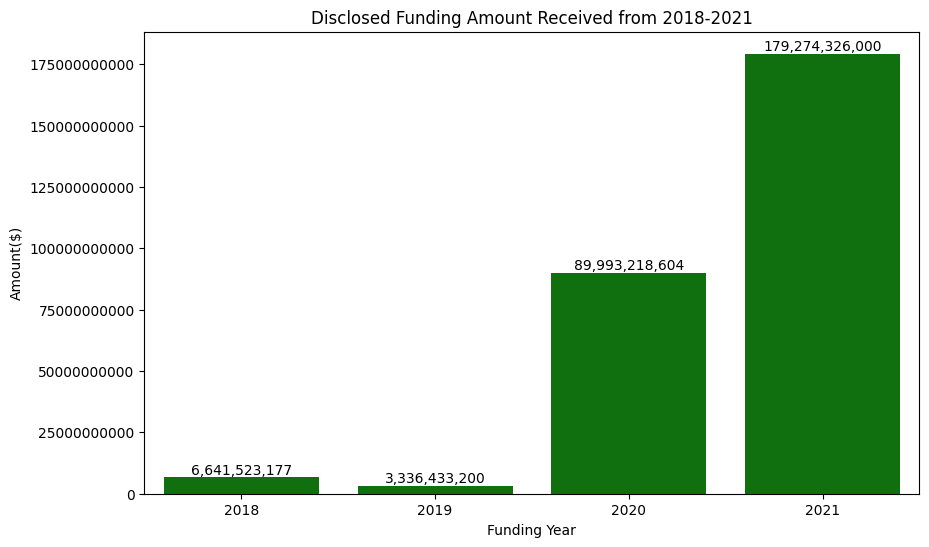

In [711]:
total_funding = full_df.groupby(by='Funding_Year')['Amount($)'].sum()
plt.figure(figsize=(10, 6))
plt.ticklabel_format(style='plain', useOffset=False)
ax = sns.barplot(total_funding, color='green')
ax.bar_label(ax.containers[0], fmt='{:,.0f}',)
plt.title('Disclosed Funding Amount Received from 2018-2021')
plt.xlabel('Funding Year')
plt.show()

<p>From the above plot we are able to identify the disclosed amount of funding received by startups from investors over the period of 2018 to 2021. There was a decline in the disclosed amount of funding received from 2018 to 2019 and a significant increase of funding received from 2019 all the way to 2021.</p>

<p>This shows that disclosed funding amount is increasing over time and more startups will spring up which will mean more funding will be needed from more investors.</p>

### 2. What is the trend for the number of startups that received diclosed amount funding from 2018-2021?

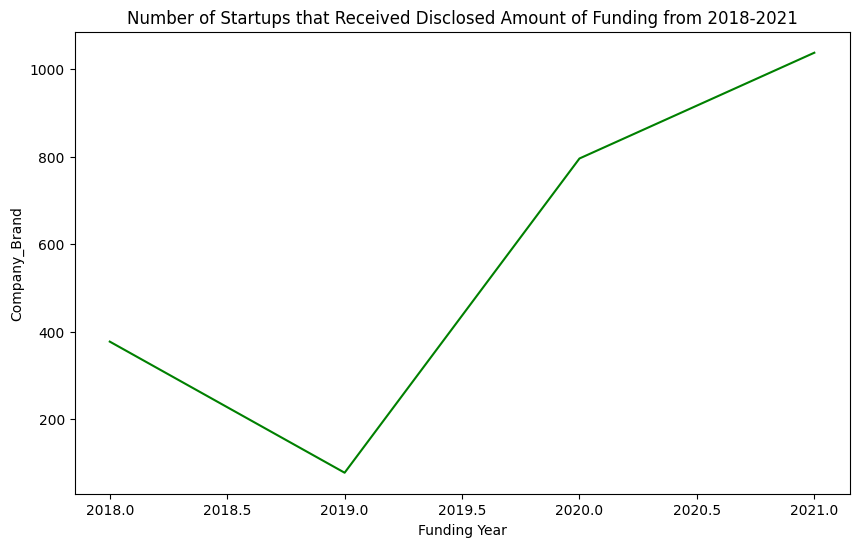

In [712]:
total_startups = full_df.groupby(by='Funding_Year')['Company_Brand'].count()
plt.figure(figsize=(10, 6))
plt.ticklabel_format(style='plain', useOffset=False)
sns.lineplot(total_startups, color='green')
plt.title('Number of Startups that Received Disclosed Amount of Funding from 2018-2021')
plt.xlabel('Funding Year')
plt.show()

<p>There was a sharp decline in the number of startups who received funding from investors from 2018 to 2019. The number of startups who received funding increased exponentially from 2019 to 2021.</p>

<p>Due to the huge sums of money investors are willing to fund startup firms with, this translates into more startups coming up and this will continue as more and more money is used to fund startups.</p>

### 3. What is the total disclosed amount of funding for startups based on their sector?

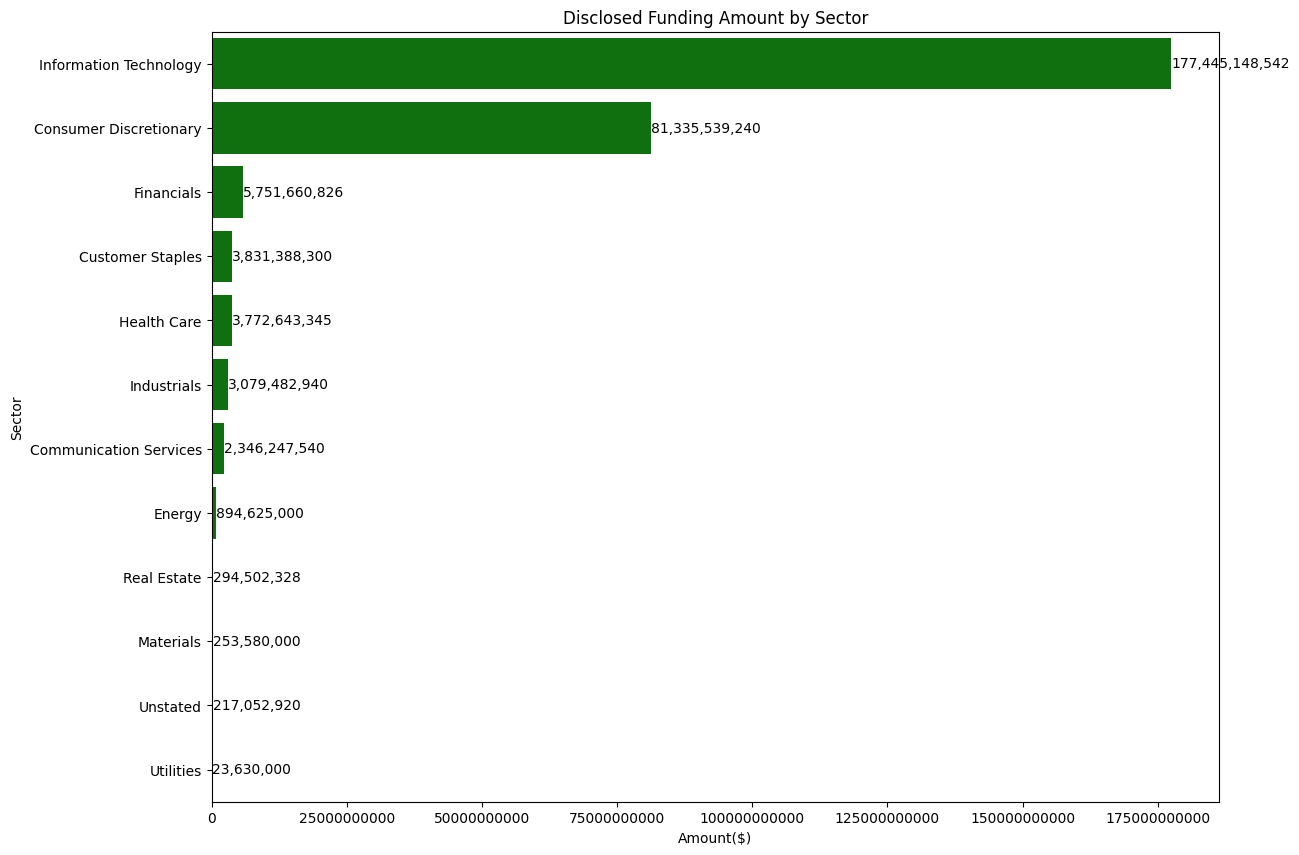

In [713]:
total_funding_by_sector = full_df.groupby(by='Sector')['Amount($)'].sum().reset_index()
total_funding_by_sector_sorted = total_funding_by_sector.sort_values('Amount($)', ascending=False)
plt.figure(figsize=(13, 10))
plt.ticklabel_format(style='plain', useOffset=False)
ax = sns.barplot(x='Amount($)', y='Sector', data=total_funding_by_sector_sorted, color='green')
ax.bar_label(ax.containers[0], fmt='{:,.0f}')
plt.title('Disclosed Funding Amount by Sector')
plt.xlabel('Amount($)')
plt.show()

<p>From the above plot we can observe that Information Technology sector receives most of the fundings that goes to startups followed by Consumer Discretionary. Most investors find these sectors lucurative and worth investing in them which results in the highest amount of funding going to these investors and the remaining amount of funding, shared amoungs the other sectors.</p>

<p>The plot depicts that Utilites sector received the least amount of funding which translates that the sector is not very attractive and won't yield good returns for investors. It is also observed that Companies that didn't state their sector didn't also received and good amount of funding.</P>

### 4. What are the three locations that received the most disclosed funding amount?

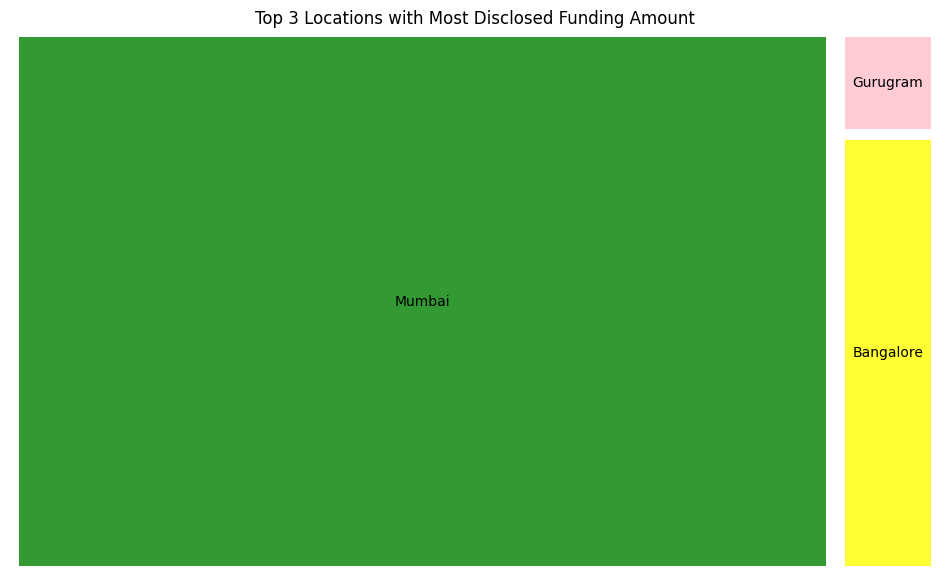

In [714]:
top_3_categories = full_df.groupby(by='HeadQuarter')['Amount($)'].sum().reset_index()
top_3_categories_sort = top_3_categories.sort_values('Amount($)', ascending=False)
plt.figure(figsize=(12,7))
plt.ticklabel_format(style='plain', useOffset=False)


colors = ['green', 'yellow', 'pink']
sq.plot(sizes=top_3_categories_sort['Amount($)'].head(3),
        label=top_3_categories_sort['HeadQuarter'].head(3),
        pad= True,alpha=0.8,color=colors)
plt.title('Top 3 Locations with Most Disclosed Funding Amount')
plt.axis('off')
plt.show()

From our treemap we observe that companies whose HeadQuarters are located in Mumbai received most of the funding from investors followed by Bangalore and Gurugram.

<p>This suggest that investors find it promising to invest in these locations. Investors who are looking at venturing into the Indian Startup Ecosystem should look for opportunities to invest in these areas.</p>

### 5. What are the three locations that received the lowest disclosed funding amounts?

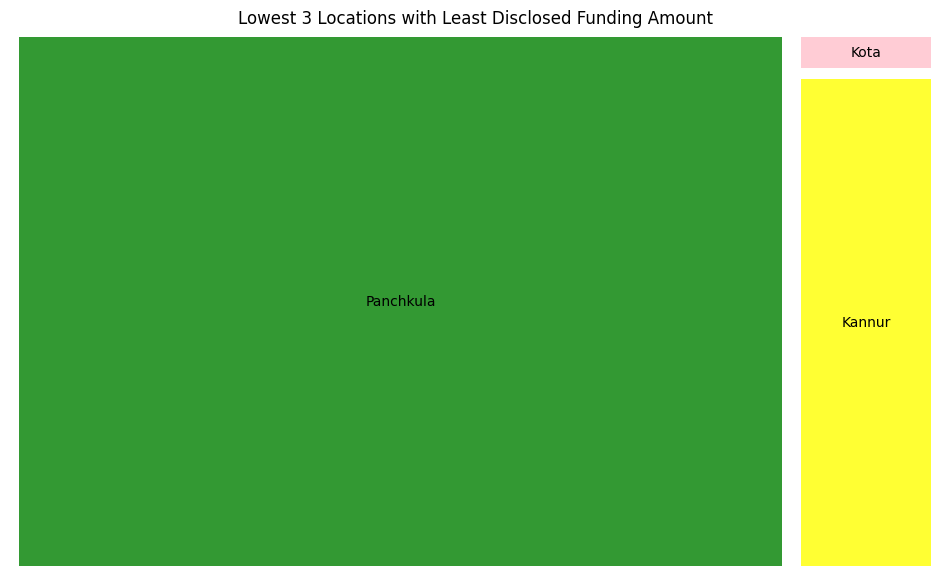

In [715]:
lowest_3_categories = full_df.groupby(by='HeadQuarter')['Amount($)'].sum().reset_index()
lowest_3_categories_sort = lowest_3_categories.sort_values('Amount($)', ascending=False)
plt.figure(figsize=(12,7))
plt.ticklabel_format(style='plain', useOffset=False)


colors = ['green', 'yellow', 'pink']
sq.plot(sizes=lowest_3_categories_sort['Amount($)'].tail(3),
        label=lowest_3_categories_sort['HeadQuarter'].tail(3),
        pad= True,alpha=0.8,color=colors)
plt.title('Lowest 3 Locations with Least Disclosed Funding Amount')
plt.axis('off')
plt.show()

From our treemap we observe that companies whose HeadQuarters are located in Panchkula received least of the funding from investors followed by Kannur and Kota.

<p>This suggest that investors do not find it promising to invest in these locations. Investors who are looking at venturing into the Indian Startup Ecosystem should look for opportunities else where other than these locations.</p>

### 6. What is the relationship between stage and funding receive?

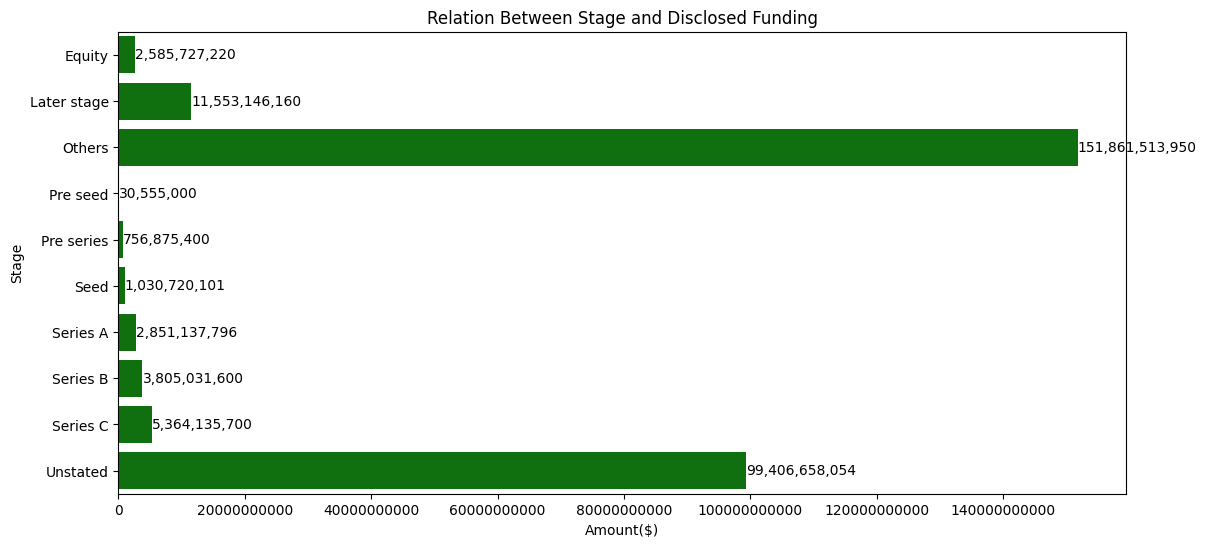

In [716]:
stage_and_funding_rel = full_df.groupby(by='Stage')['Amount($)'].sum().reset_index()
plt.figure(figsize=(13, 6))
plt.ticklabel_format(style='plain', useOffset=False)
ax = sns.barplot(x='Amount($)', y='Stage', data=stage_and_funding_rel, color='green')
ax.bar_label(ax.containers[0], fmt='{:,.0f}')
plt.title('Relation Between Stage and Disclosed Funding')
plt.show()

The plot above depicts to use that there is a trend in the stage of funding and the funding amount received. The higher your stage of funding, the higher the amount of funding received.

<p>Pre seed stage funding will not receive the same amount of funding as a Later stage startup will receive. Others and Unstated has the highest since most of the firms did not state and failed to give accurate information on their funding stage.</p>

### 7. How many tech and non tech startups received disclosed funding amount from investors from 2018-2021?

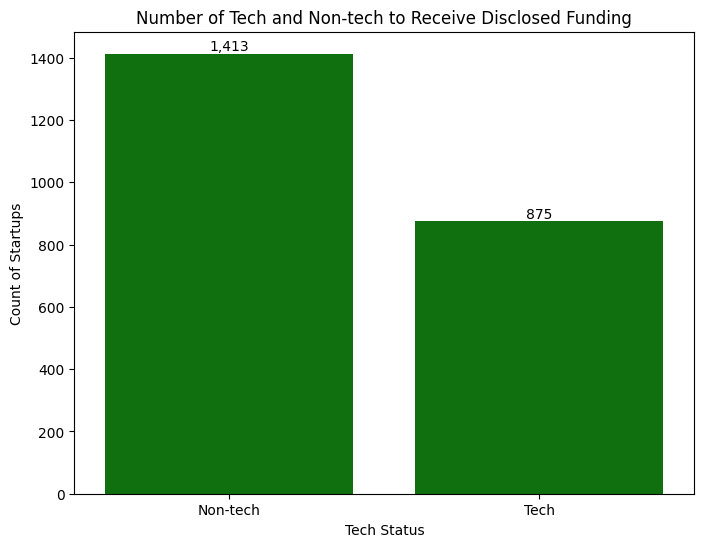

In [717]:
number_of_tech_and_nontech = full_df.groupby(by='Tech_Status')['Tech_Status'].count()
plt.figure(figsize=(8, 6))
plt.ticklabel_format(style='plain', useOffset=False)
ax = sns.barplot(number_of_tech_and_nontech, color='green')
ax.bar_label(ax.containers[0], fmt='{:,.0f}',)
plt.title('Number of Tech and Non-tech to Receive Disclosed Funding')
plt.xlabel('Tech Status')
plt.ylabel('Count of Startups')
plt.show()

The plot shows us the number of Tech and Non-tech startups to receive funding from investors from 2018 to 2021. More non-tech startups received more funding from investors than tech startups.

### 8. How much disclosed funding amount was received by tech and non-tech companies?

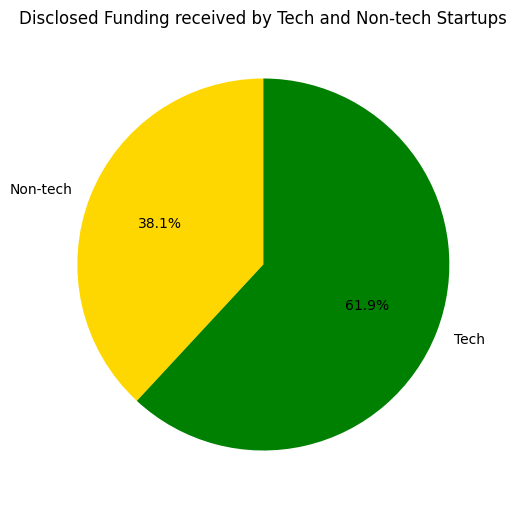

In [718]:
funding_for_tech_and_nontech = full_df.groupby(by='Tech_Status')['Amount($)'].sum()
plt.figure(figsize=(6,8))
plt.pie(funding_for_tech_and_nontech,
        labels=funding_for_tech_and_nontech.index,
        autopct='%1.1f%%', startangle=90, colors=['gold', 'green'])
plt.title('Disclosed Funding received by Tech and Non-tech Startups')
plt.show()

In [719]:
pd.set_option('display.float_format', '{:,.2f}'.format)

pivot_table = full_df.pivot_table(values='Amount($)', index='Tech_Status', aggfunc=sum)
print(pivot_table)

                     Amount($)
Tech_Status                   
Non-tech    106,394,211,906.00
Tech        172,851,289,075.00


We see that Tech startups received more disclosed funding from investors compared to Non-tech startups. From our piechart, 61.9% of the funding received by startups went to the tech startups whiles the remaining 38.1% also went to Non-tech startups. In amount, we observe from our pivot table that Tech startups received over 70 billion dollars in disclosed funding more than Non-tech startups.

<p>Tech startups need more funding to flourish and as such need more investors to support them in the coming years.</p>